<div style="text-align: center; color: #007BFF;">
    <h1>Breast Cancer Wisconsin (Diagnostic) Data Set
</h1>
</div>


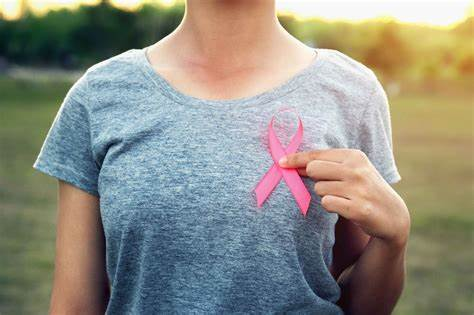

**Breast Cancer Wisconsin (Diagnostic) Data Set**

The Breast Cancer Wisconsin (Diagnostic) Data Set is a dataset used for classification tasks, specifically for diagnosing breast cancer. The dataset contains information about various features computed for cell nuclei found in breast cancer biopsies. The goal is to predict whether a cell nucleus is malignant (indicating cancerous cells) or benign (indicating non-cancerous cells).

**Attribute Information:**

1. **ID number:** Unique identifier for each biopsy sample.
2. **Diagnosis:** The target variable, indicating the diagnosis. Malignant (M) represents cancerous cells, and Benign (B) represents non-cancerous cells.
3-12. **Ten real-valued features:** These features are computed for each cell nucleus:
    a) **Radius:** The mean of distances from the center to points on the perimeter.
    b) **Texture:** The standard deviation of gray-scale values.
    c) **Perimeter:** The perimeter of the cell nucleus.
    d) **Area:** The area of the cell nucleus.
    e) **Smoothness:** The local variation in radius lengths.
    f) **Compactness:** Calculated as (perimeter^2 / area - 1.0).
    g) **Concavity:** Indicates the severity of concave portions of the contour.
    h) **Concave Points:** The number of concave portions of the contour.
    i) **Symmetry:** A measure of symmetry in the cell nucleus.
    j) **Fractal Dimension:** Represents the "coastline approximation" - 1.

**Data Description:**

The dataset contains a total of 30 features. For each feature, there are three values recorded for each image: mean, standard error, and "worst" or largest (mean of the three largest values). Therefore, there are a total of 30 * 3 = 90 columns, but you may use only the mean values (fields 3-12) for your analysis if needed.

**Missing Attribute Values:**

There are no missing attribute values in this dataset.

**Class Distribution:**

The dataset is imbalanced, with the following class distribution:
- Benign (B): 357 samples
- Malignant (M): 212 samples

**Usage:**

This dataset is widely used in machine learning and data analysis for tasks related to breast cancer classification. The goal is to build a model that can accurately distinguish between benign and malignant cells based on the given features.

**References:**

1. W.N. Street, W.H. Wolberg, and O.L. Mangasarian. "Nuclear feature extraction for breast tumor diagnosis." IS&T/SPIE 1993 International Symposium on Electronic Imaging: Science and Technology, volume 1905, pages 861-870, San Jose, CA, 1993.
2. Dataset source: UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29)

**Model Overview:**

In this notebook, we used several machine learning algorithms to classify the Breast Cancer Wisconsin (Diagnostic) Data Set. The goal was to build predictive models that can accurately distinguish between benign and malignant breast cancer cells based on the provided features.

**1. Logistic Regression:**
Logistic Regression is a simple and widely used classification algorithm. It models the probability of a binary outcome (in this case, benign or malignant) using a logistic function. It is suitable for problems with a linear decision boundary. Logistic Regression is interpretable and computationally efficient.

**2. Decision Tree:**
Decision Trees are non-linear models that recursively partition the data into subsets based on the feature values. At each node, the algorithm selects the feature that best splits the data and creates branches accordingly. Decision Trees are easy to interpret, but they can be prone to overfitting.

**3. Random Forest:**
Random Forest is an ensemble learning method that combines multiple decision trees to make predictions. It builds several decision trees using bootstrap samples of the data and random feature subsets. The final prediction is obtained by averaging the predictions of individual trees, reducing overfitting and improving accuracy.

**4. Bagging Algorithm (Bootstrap Aggregating):**
Bagging is an ensemble learning technique that reduces variance by creating multiple copies of the training dataset through bootstrapping. It trains each model on a different subset of the data and then combines their predictions. Bagging works well with unstable models and can improve accuracy.

**5. K-Nearest Neighbors (KNN) Algorithm:**
K-Nearest Neighbors is a simple and intuitive classification algorithm. It assigns a data point to the class based on the majority class of its k-nearest neighbors. The value of k is a hyperparameter that affects the model's performance. KNN is lazy learning and requires minimal training, but it can be computationally expensive during prediction.

**6. Support Vector Machine (SVM):**
Support Vector Machine is a powerful classification algorithm used for both linear and non-linear data. It aims to find the optimal hyperplane that maximizes the margin between different classes. SVM can handle high-dimensional data well and is effective for binary classification tasks.


# Importing Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


pd.set_option("display.max_rows", 10000)
pd.set_option('display.max_columns',15)
pd.set_option('display.width', 10000)

In [2]:
dataset = pd.read_csv('breast-cancer.csv')
dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,...,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,...,2019.0,0.16220,0.66560,0.711900,0.265400,0.4601,0.11890
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,...,1956.0,0.12380,0.18660,0.241600,0.186000,0.2750,0.08902
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,...,1709.0,0.14440,0.42450,0.450400,0.243000,0.3613,0.08758
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,...,567.7,0.20980,0.86630,0.686900,0.257500,0.6638,0.17300
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,...,1575.0,0.13740,0.20500,0.400000,0.162500,0.2364,0.07678
5,843786,M,12.450,15.70,82.57,477.1,0.12780,...,741.6,0.17910,0.52490,0.535500,0.174100,0.3985,0.12440
6,844359,M,18.250,19.98,119.60,1040.0,0.09463,...,1606.0,0.14420,0.25760,0.378400,0.193200,0.3063,0.08368
7,84458202,M,13.710,20.83,90.20,577.9,0.11890,...,897.0,0.16540,0.36820,0.267800,0.155600,0.3196,0.11510
8,844981,M,13.000,21.82,87.50,519.8,0.12730,...,739.3,0.17030,0.54010,0.539000,0.206000,0.4378,0.10720
9,84501001,M,12.460,24.04,83.97,475.9,0.11860,...,711.4,0.18530,1.05800,1.105000,0.221000,0.4366,0.20750


In [3]:
dataset.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,...,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,...,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,...,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,...,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,...,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,...,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,...,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,...,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [4]:
dataset.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'], dtype='object')

# Data Preprocessing 

In [5]:
dataset.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# Visualization

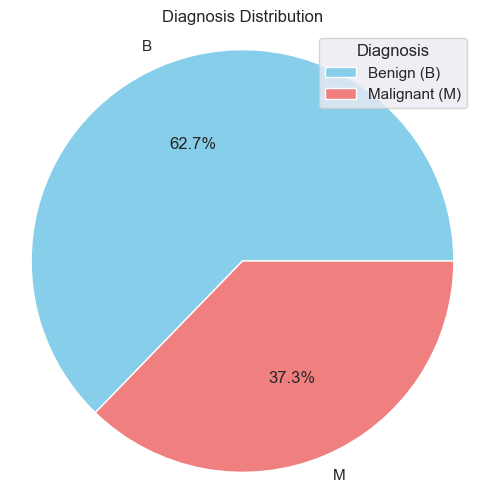

In [7]:
diagnosis_counts = dataset['diagnosis'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(diagnosis_counts, labels=diagnosis_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Diagnosis Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(title='Diagnosis', labels=['Benign (B)', 'Malignant (M)'], loc='upper right')


# Show the plot
plt.show()


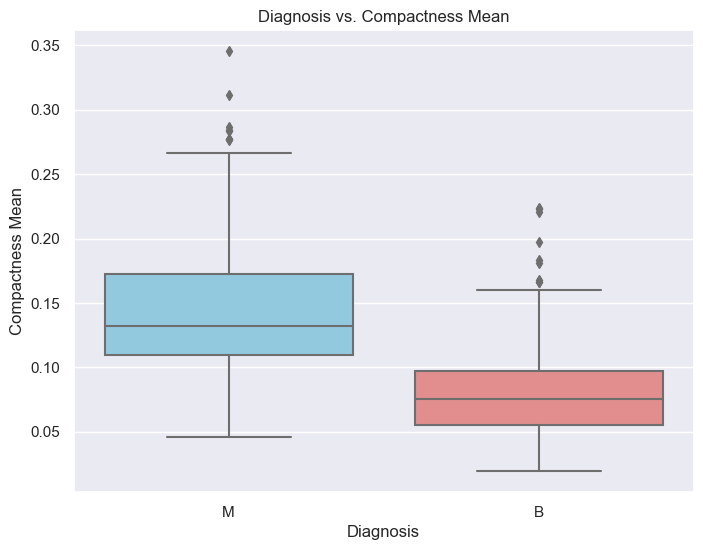

In [8]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='diagnosis', y='compactness_mean', data=dataset, palette=['skyblue', 'lightcoral'])
plt.title('Diagnosis vs. Compactness Mean')
plt.xlabel('Diagnosis')
plt.ylabel('Compactness Mean')

# Show the plot
plt.show()

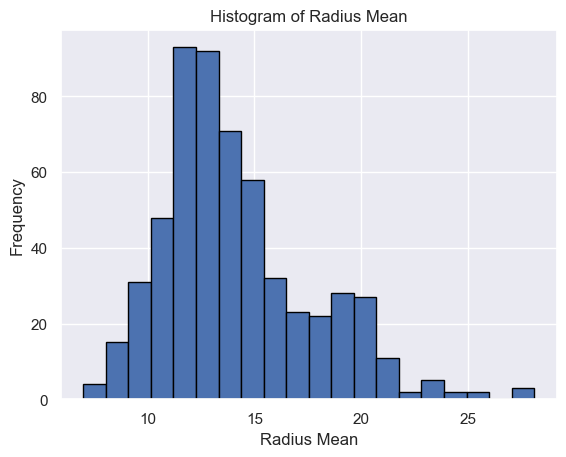

In [9]:
import matplotlib.pyplot as plt

plt.hist(dataset['radius_mean'], bins=20, edgecolor='black')
plt.xlabel('Radius Mean')
plt.ylabel('Frequency')
plt.title('Histogram of Radius Mean')
plt.show()

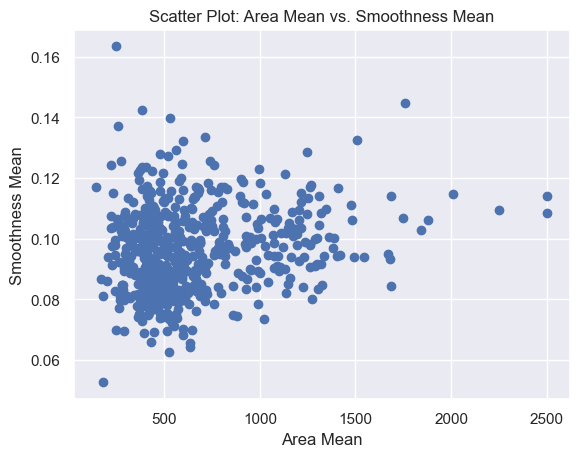

In [10]:
plt.scatter(dataset['area_mean'], dataset['smoothness_mean'])
plt.xlabel('Area Mean')
plt.ylabel('Smoothness Mean')
plt.title('Scatter Plot: Area Mean vs. Smoothness Mean')
plt.show()


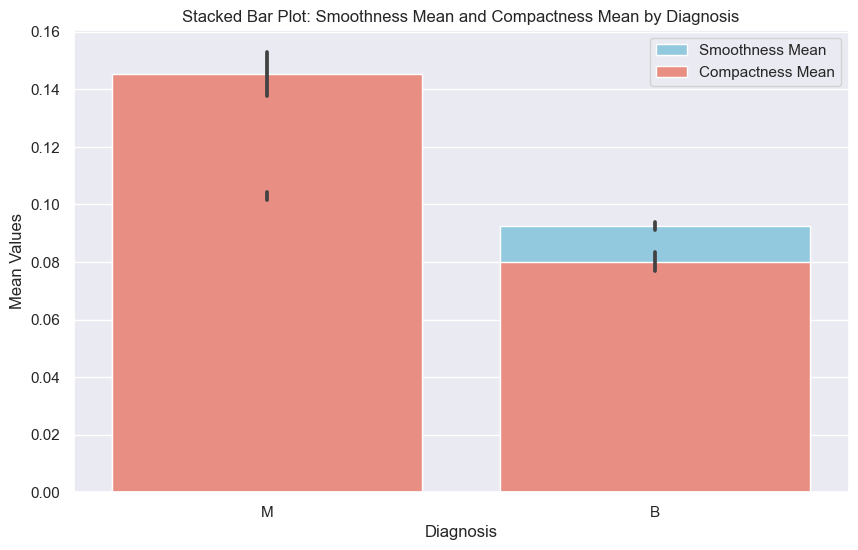

In [11]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='diagnosis', y='smoothness_mean', data=dataset, color='skyblue', label='Smoothness Mean')
sns.barplot(x='diagnosis', y='compactness_mean', data=dataset, color='salmon', label='Compactness Mean')
plt.xlabel('Diagnosis')
plt.ylabel('Mean Values')
plt.title('Stacked Bar Plot: Smoothness Mean and Compactness Mean by Diagnosis')
plt.legend()
plt.show()


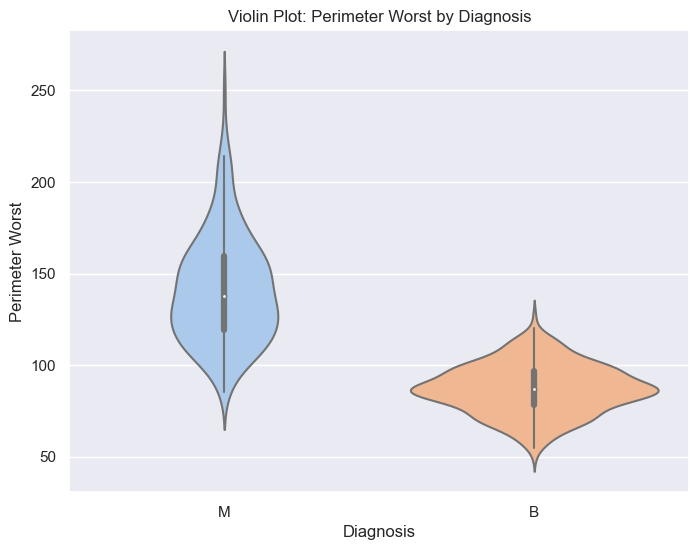

In [12]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='diagnosis', y='perimeter_worst', data=dataset, palette='pastel')
plt.xlabel('Diagnosis')
plt.ylabel('Perimeter Worst')
plt.title('Violin Plot: Perimeter Worst by Diagnosis')
plt.show()


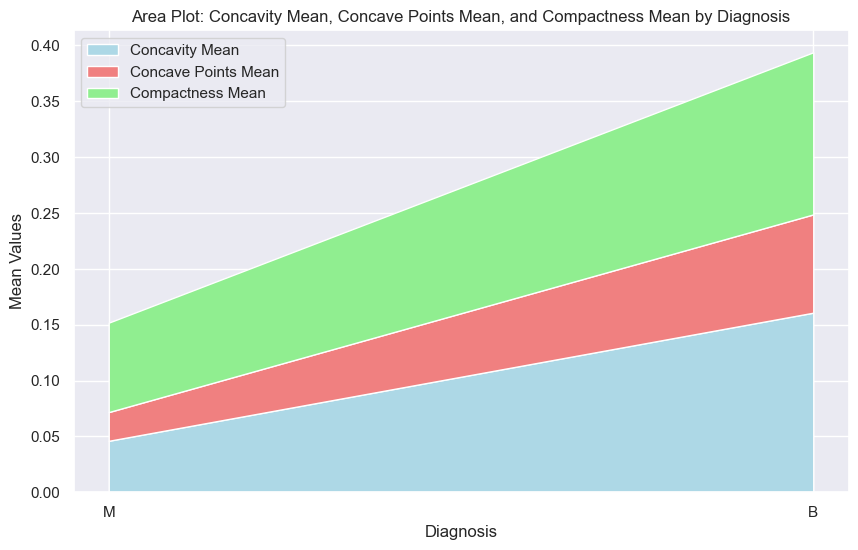

In [13]:
plt.figure(figsize=(10, 6))
colors = ['lightblue', 'lightcoral', 'lightgreen']
plt.stackplot(dataset['diagnosis'].unique(),
              dataset.groupby('diagnosis')['concavity_mean'].mean(),
              dataset.groupby('diagnosis')['concave points_mean'].mean(),
              dataset.groupby('diagnosis')['compactness_mean'].mean(),
              labels=['Concavity Mean', 'Concave Points Mean', 'Compactness Mean'],
              colors=colors)
plt.xlabel('Diagnosis')
plt.ylabel('Mean Values')
plt.title('Area Plot: Concavity Mean, Concave Points Mean, and Compactness Mean by Diagnosis')
plt.legend(loc='upper left')
plt.show()


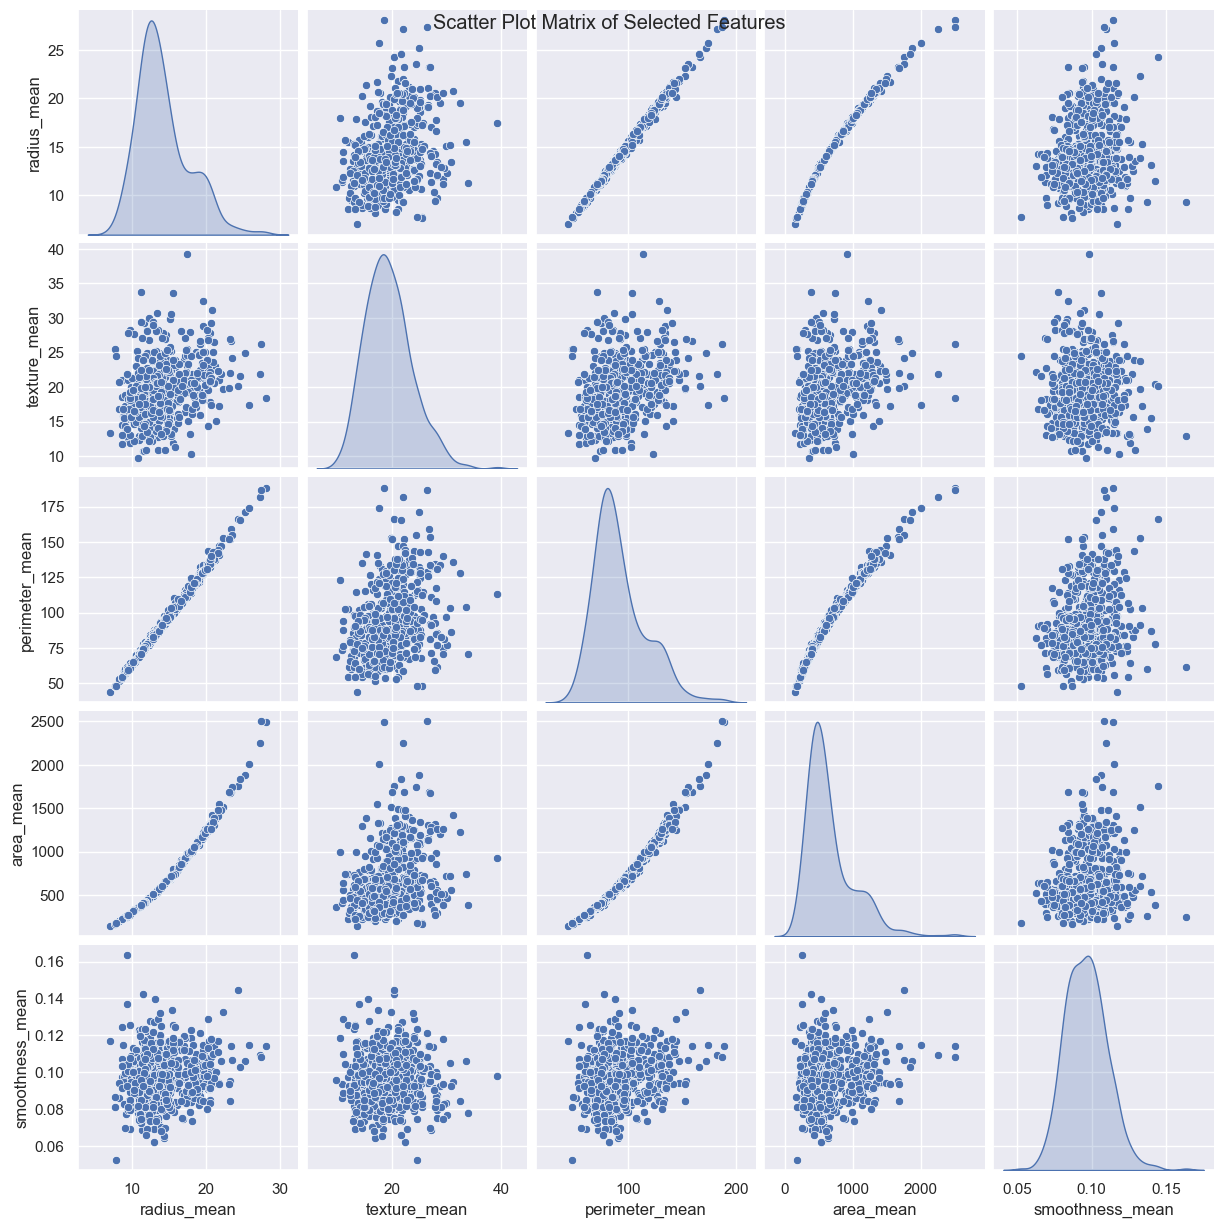

In [14]:
selected_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']
sns.pairplot(dataset[selected_features], diag_kind='kde', palette='viridis')
plt.suptitle('Scatter Plot Matrix of Selected Features')
plt.show()


In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

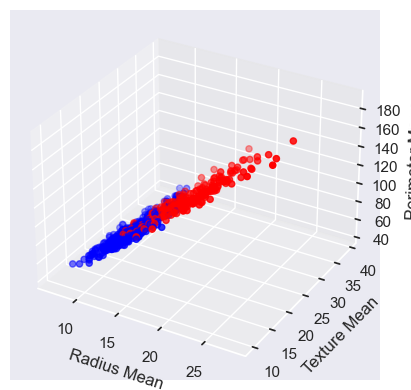

<Figure size 1000x800 with 0 Axes>

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Assign colors to benign (B) and malignant (M) data points
colors = {'B': 'blue', 'M': 'red'}
dataset['color'] = dataset['diagnosis'].map(colors)

fig = plt.figure(figsize=(10, 8)) 
ax.scatter(dataset['radius_mean'], dataset['texture_mean'], dataset['perimeter_mean'], c=dataset['color'])
ax.set_xlabel('Radius Mean')
ax.set_ylabel('Texture Mean')
ax.set_zlabel('Perimeter Mean')
# Adjust the layout
plt.tight_layout()
plt.show()

# Encoding

In [17]:
dataset = dataset.iloc[:,1:]
dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,...,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,color
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,...,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,red
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,...,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,red
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,...,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,red
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,...,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,red
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,...,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,red


In [18]:
dataset['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

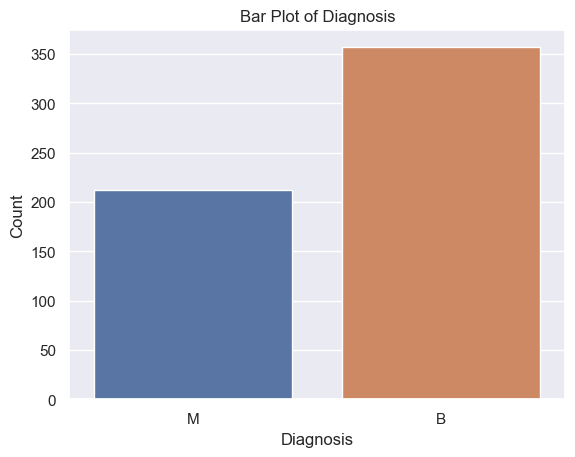

In [19]:
sns.countplot(x='diagnosis', data=dataset)
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.title('Bar Plot of Diagnosis')
plt.show()


In [20]:
dataset['diagnosis'] = dataset['diagnosis'].astype('category')
dataset['diagnosis'] = dataset['diagnosis'].cat.codes

In [21]:
dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,...,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,color
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,...,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,red
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,...,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,red
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,...,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,red
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,...,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,red
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,...,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,red


In [22]:
for i in dataset.columns:
    print("**********************************", i ,
         "*******************************************")
    print()
    print(set(dataset[i].tolist()))
    print()

********************************** diagnosis *******************************************

{0, 1}

********************************** radius_mean *******************************************

{6.981, 7.729, 8.196, 9.504, 10.95, 11.42, 12.45, 13.53, 13.73, 14.54, 14.68, 13.71, 13.0, 12.46, 16.02, 17.99, 18.25, 19.69, 20.57, 20.29, 19.17, 19.81, 21.16, 20.18, 25.22, 22.27, 24.25, 27.22, 28.11, 27.42, 9.738, 9.0, 9.268, 10.75, 10.25, 11.75, 11.5, 11.25, 12.0, 12.25, 12.75, 13.75, 13.5, 14.25, 14.5, 15.75, 15.0, 15.5, 16.78, 16.03, 16.5, 16.25, 17.47, 17.75, 18.22, 18.03, 19.0, 19.53, 20.47, 21.75, 8.726, 8.571, 9.72, 9.333, 10.44, 10.94, 10.97, 11.22, 11.47, 11.94, 11.69, 12.19, 12.47, 12.72, 12.94, 12.22, 13.44, 13.69, 13.47, 13.94, 14.44, 14.97, 14.22, 14.19, 14.69, 15.19, 14.47, 15.22, 9.029, 9.904, 10.66, 10.91, 10.16, 11.41, 11.66, 11.16, 12.91, 12.16, 13.66, 13.16, 14.41, 15.66, 16.13, 16.16, 16.69, 17.19, 17.91, 18.63, 18.94, 18.66, 19.16, 19.19, 19.44, 20.16, 20.94, 20.44, 20.13, 24

In [23]:
# Split the data into ind variable and dep variable
x = dataset.drop(['diagnosis', 'color'], axis=1)
y = dataset[['diagnosis']]

In [24]:
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,...,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,...,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,...,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,...,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,...,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,...,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [25]:
y.head()

,diagnosis
0,1
1,1
2,1
3,1
4,1


# Feature Scaling

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x1 = sc.fit_transform(x)

In [27]:
# Check imbalance dataset
y.value_counts()

diagnosis
0            357
1            212
dtype: int64

In [28]:
dataset.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,...,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,...,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,...,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,...,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,...,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,...,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,...,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,...,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,...,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,...,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,...,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


<Axes: >

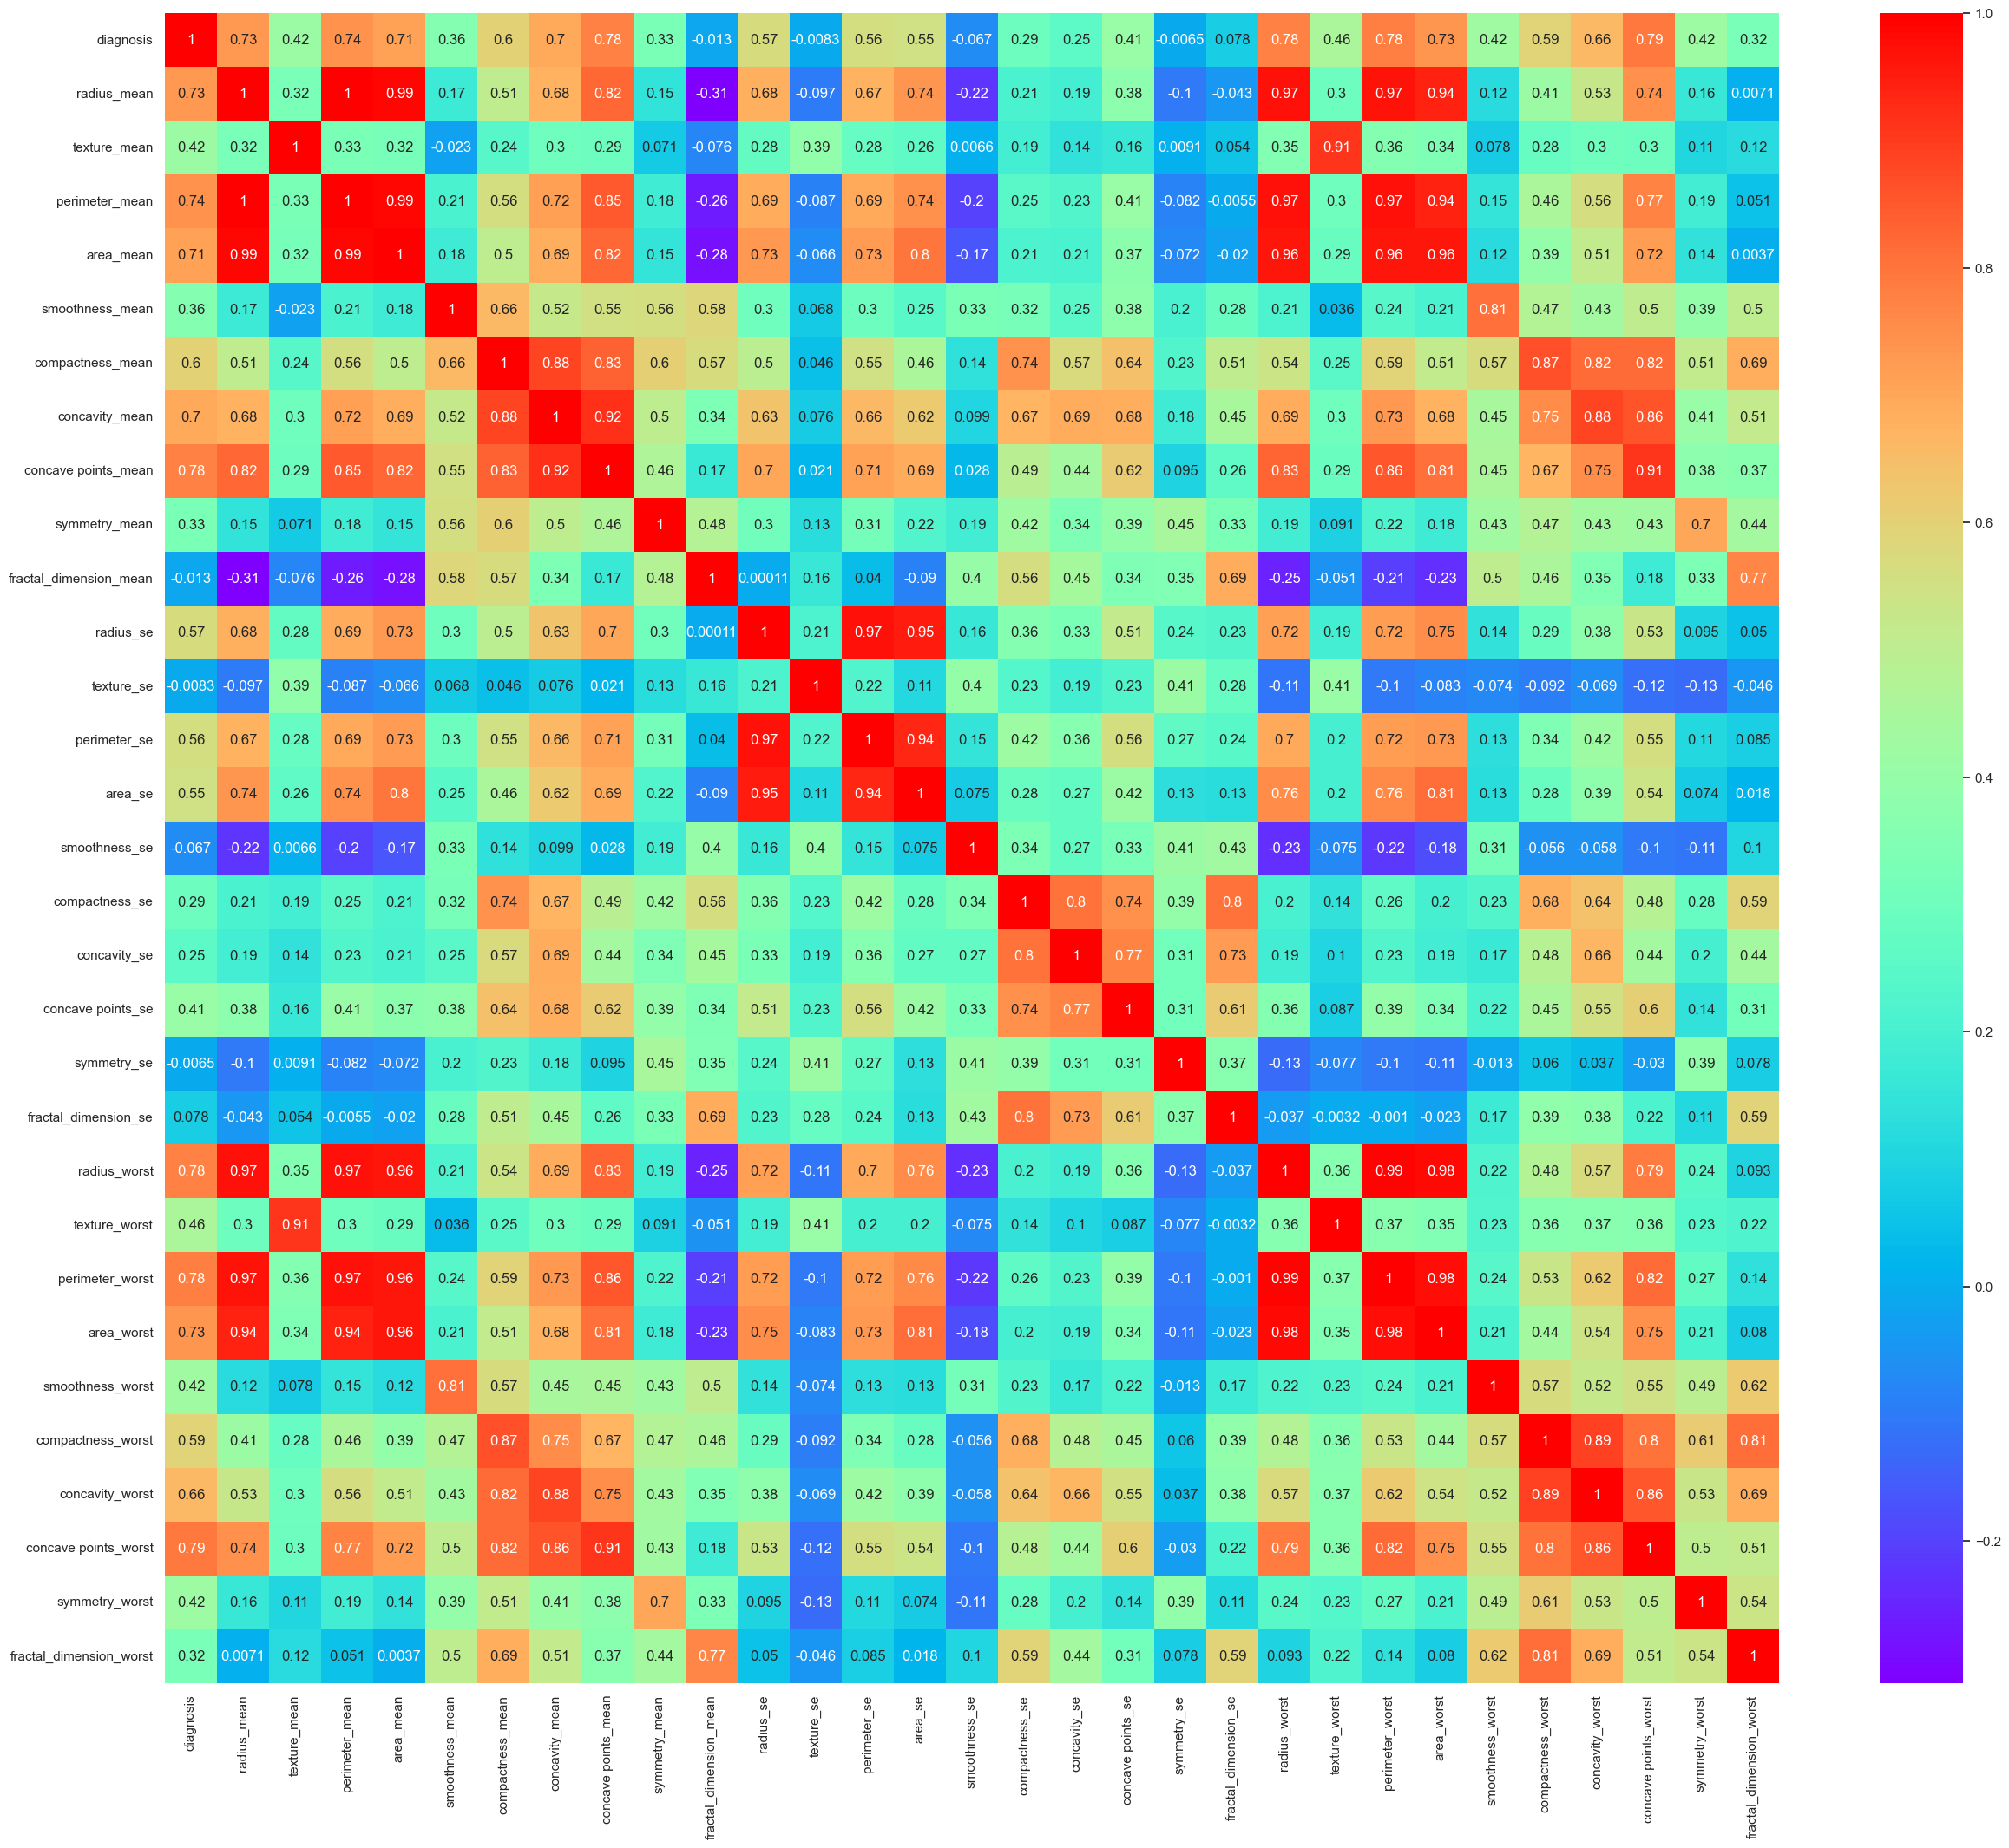

In [29]:
plt.figure(figsize=(30,25))
sns.heatmap(dataset.corr(), annot=True, cmap='rainbow')

# Split the Train and Test Data

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import export_text

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x, y, train_size=0.75, random_state=102)

# Logistic Regression Model

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
logit = LogisticRegression(multi_class='multinomial')
logit.fit(x_train, y_train)

LogisticRegression(multi_class='multinomial')

In [34]:
y_pred_train = logit.predict(x_train)
y_pred_test = logit.predict(x_test)

In [35]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [36]:
print( classification_report(y_train, y_pred_train))
print("****************"*10)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       264
           1       0.96      0.93      0.94       162

    accuracy                           0.96       426
   macro avg       0.96      0.95      0.95       426
weighted avg       0.96      0.96      0.96       426

****************************************************************************************************************************************************************
              precision    recall  f1-score   support

           0       0.97      0.98      0.97        93
           1       0.96      0.94      0.95        50

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.97      0.96       143



In [37]:
print( confusion_matrix(y_train, y_pred_train))
print("****************"*10)
print(confusion_matrix(y_test, y_pred_test))

[[258   6]
 [ 12 150]]
****************************************************************************************************************************************************************
[[91  2]
 [ 3 47]]


In [38]:
print("Training Accuracy :", accuracy_score(y_train, y_pred_train))
print("****************"*5)
print("Test Accuracy :", accuracy_score(y_test, y_pred_test))

Training Accuracy : 0.9577464788732394
********************************************************************************
Test Accuracy : 0.965034965034965


In [39]:
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(logit, x_train, y_train, cv=10)
test_accuracy = cross_val_score(logit, x_test, y_test, cv=10)
print("Training Accuracy after CV :", training_accuracy.mean())
print("***********************"*5)
print("Test Accuracy after CV :", test_accuracy.mean())

Training Accuracy after CV : 0.9342746400885936
*******************************************************************************************************************
Test Accuracy after CV : 0.950952380952381


In [40]:
from sklearn.metrics import roc_auc_score
logit_roc_auc = roc_auc_score(y_test, y_pred_test)
logit_roc_auc

0.959247311827957

In [41]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
display(fpr[:10])
display(tpr[:10])
display(thresholds[:10])

array([0.        , 0.02150538, 1.        ])

array([0.  , 0.94, 1.  ])

array([2, 1, 0], dtype=int8)

In [42]:
tpr

array([0.  , 0.94, 1.  ])

In [43]:
thresholds

array([2, 1, 0], dtype=int8)

In [44]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
auc_score = roc_auc_score(y_test, y_pred_test)


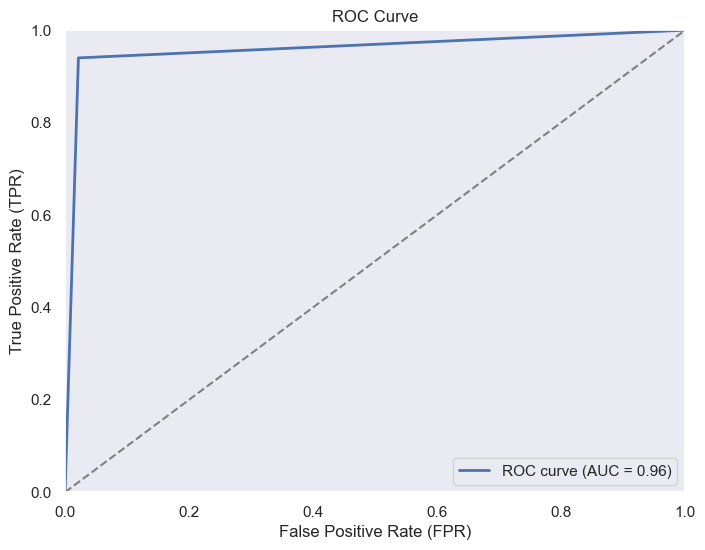

In [45]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Building DecisionTree Classifier Model
## Criterion = 'gini'
## Criterion = 'entropy'

In [46]:
from sklearn.tree import DecisionTreeClassifier
dt1 = DecisionTreeClassifier(criterion='gini')
dt1.fit(x_train, y_train)

dt2 = DecisionTreeClassifier(criterion='entropy')
dt2.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [47]:
# Predict 
# Gini
y_pred_train_dt1 = dt1.predict(x_train)
y_pred_test_dt1 = dt1.predict(x_test)

# Entropy
y_pred_train_dt2 = dt2.predict(x_train)
y_pred_test_dt2 = dt2.predict(x_test)

In [48]:
# Evaluation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [49]:
# Gini
print(classification_report(y_train, y_pred_train_dt1))
print()
print(classification_report(y_test, y_pred_test_dt1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       264
           1       1.00      1.00      1.00       162

    accuracy                           1.00       426
   macro avg       1.00      1.00      1.00       426
weighted avg       1.00      1.00      1.00       426


              precision    recall  f1-score   support

           0       0.94      0.95      0.94        93
           1       0.90      0.88      0.89        50

    accuracy                           0.92       143
   macro avg       0.92      0.91      0.92       143
weighted avg       0.92      0.92      0.92       143



In [50]:
# Entropy
print(classification_report(y_train, y_pred_train_dt2))
print()
print(classification_report(y_test, y_pred_test_dt2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       264
           1       1.00      1.00      1.00       162

    accuracy                           1.00       426
   macro avg       1.00      1.00      1.00       426
weighted avg       1.00      1.00      1.00       426


              precision    recall  f1-score   support

           0       0.97      0.98      0.97        93
           1       0.96      0.94      0.95        50

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.97      0.96       143



In [51]:
# Gini
print(confusion_matrix(y_train, y_pred_train_dt1))
print()
print(confusion_matrix(y_test, y_pred_test_dt1))

[[264   0]
 [  0 162]]

[[88  5]
 [ 6 44]]


In [52]:
# Entropy
print(confusion_matrix(y_train, y_pred_train_dt2))
print()
print(confusion_matrix(y_test, y_pred_test_dt2))

[[264   0]
 [  0 162]]

[[91  2]
 [ 3 47]]


In [53]:
# Gini
print(accuracy_score(y_train, y_pred_train_dt1))
print()
print(accuracy_score(y_test, y_pred_test_dt1))

1.0

0.9230769230769231


In [54]:
# Entropy
print(accuracy_score(y_train, y_pred_train_dt2))
print()
print(accuracy_score(y_test, y_pred_test_dt2))

1.0

0.965034965034965


# Feature Importance

In [55]:
# Check Feature Importance
pd.DataFrame(index=x.columns, data=dt1.feature_importances_, columns=['Feature Importance'])

,Feature Importance
radius_mean,0.009737
texture_mean,0.042132
perimeter_mean,0.000000
area_mean,0.000000
smoothness_mean,0.000000
compactness_mean,0.000000
concavity_mean,0.000000
concave points_mean,0.000000
symmetry_mean,0.006640
fractal_dimension_mean,0.000000


In [56]:
pd.DataFrame(index=x.columns, data=dt2.feature_importances_, columns=['Feature Importance'])

,Feature Importance
radius_mean,0.000000
texture_mean,0.013846
perimeter_mean,0.000000
area_mean,0.014004
smoothness_mean,0.019108
compactness_mean,0.000000
concavity_mean,0.000000
concave points_mean,0.000000
symmetry_mean,0.000000
fractal_dimension_mean,0.000000


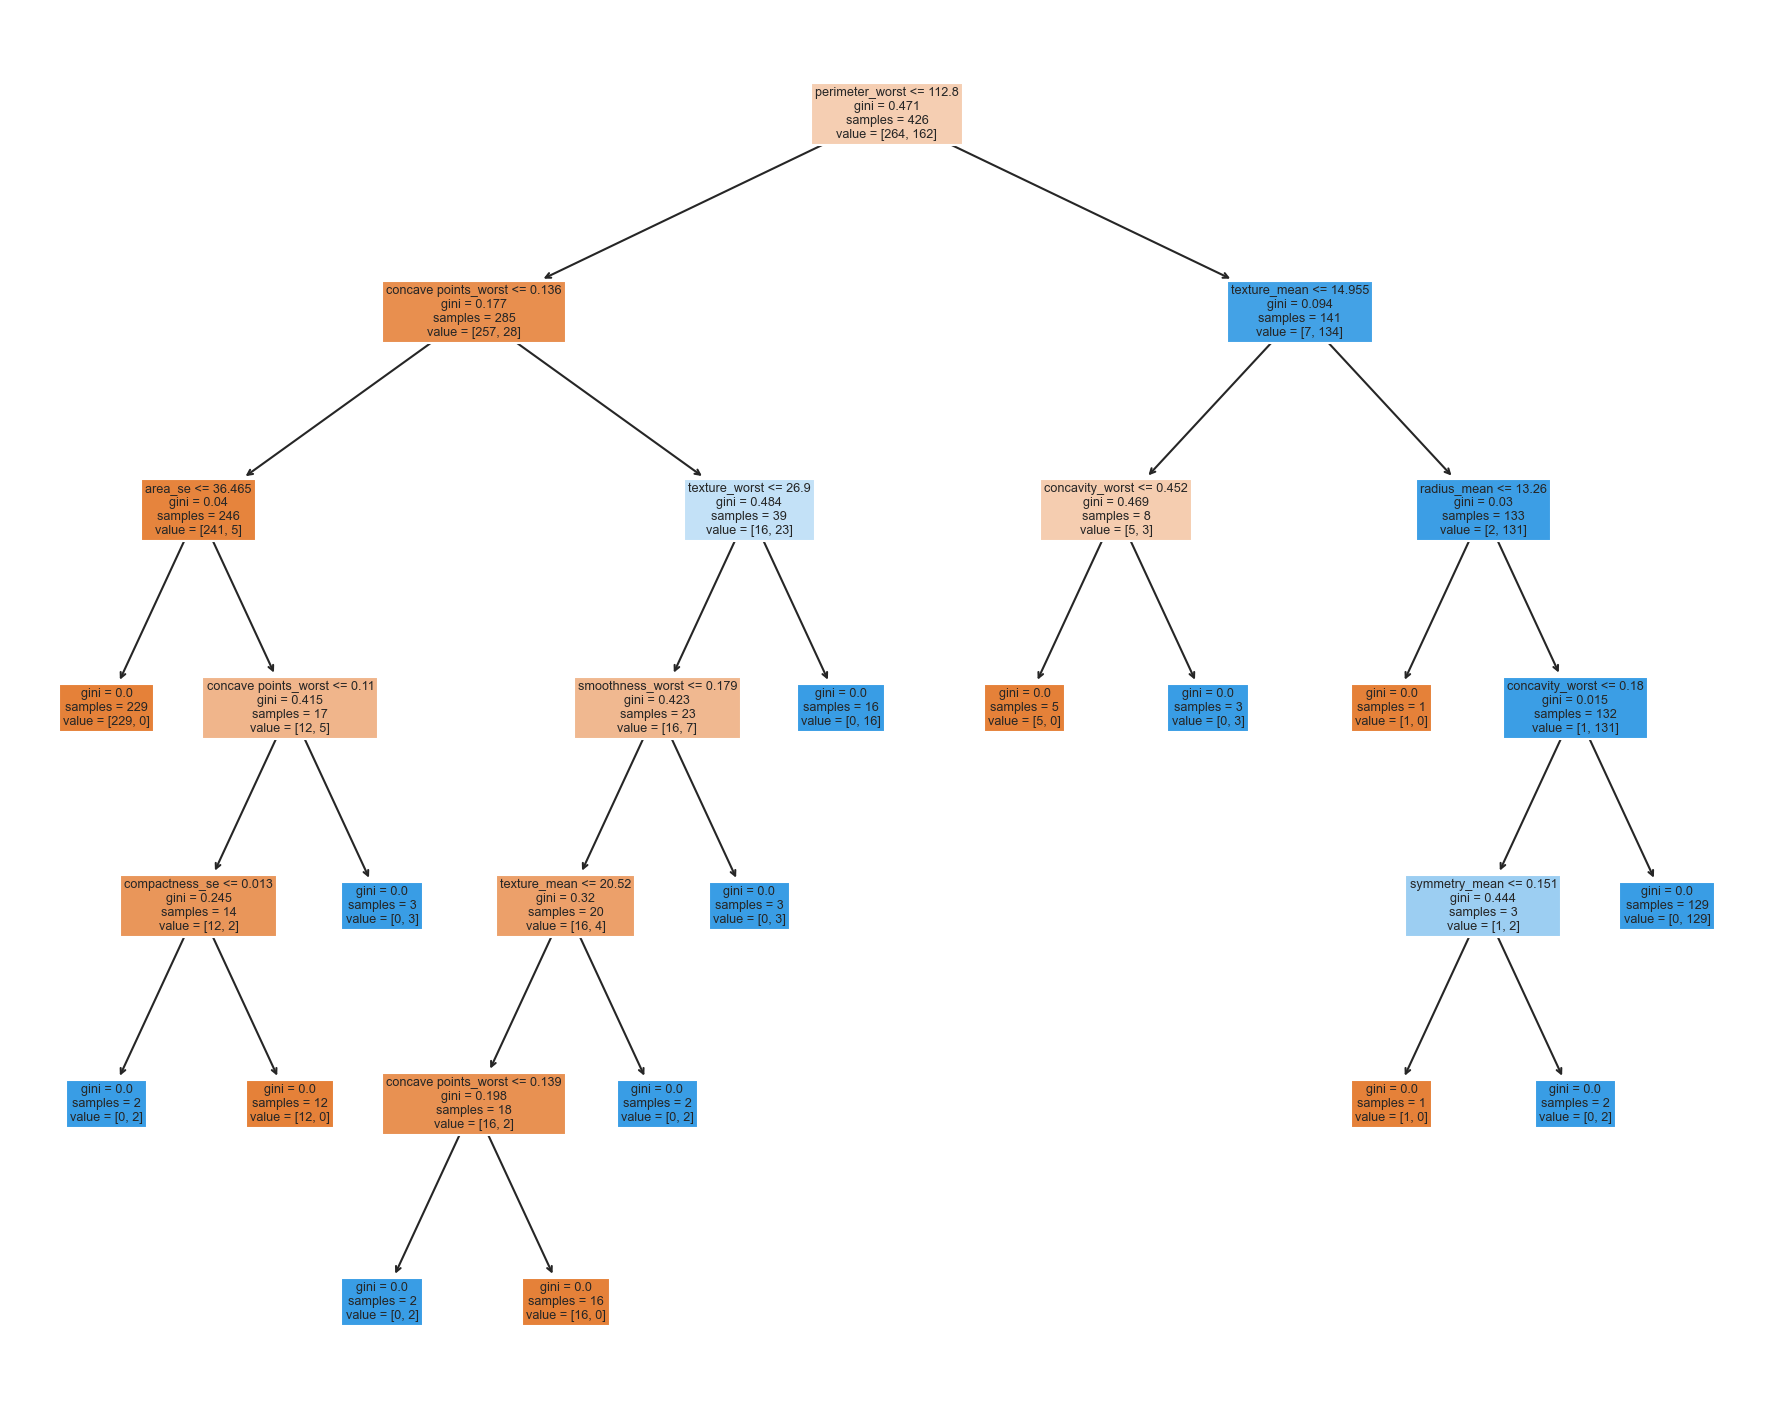

In [57]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,12), dpi=150)
plot_tree(dt1, filled=True, feature_names = x.columns)
plt.show()

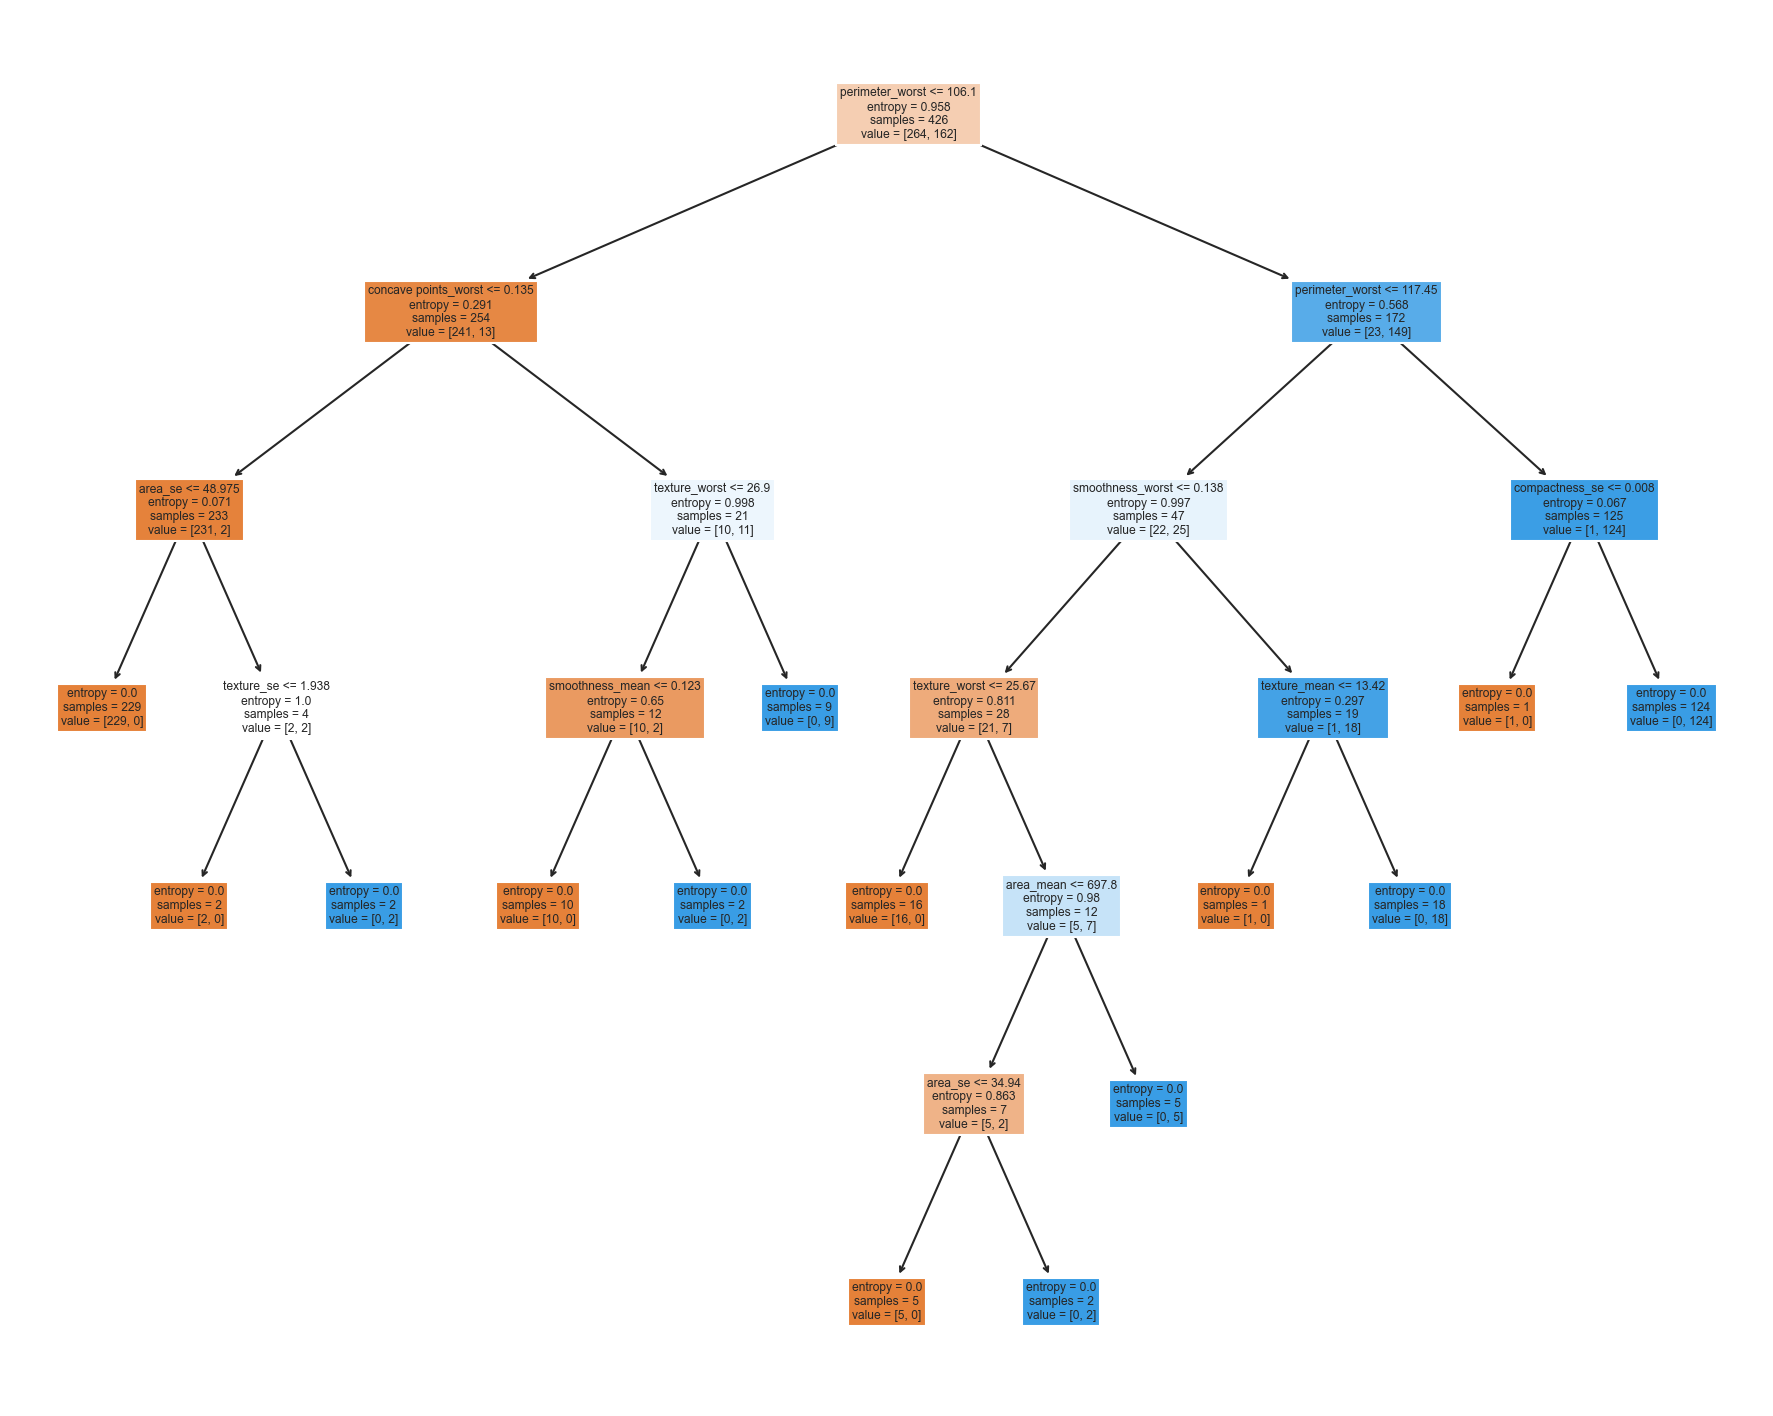

In [58]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,12), dpi=150)
plot_tree(dt2, filled=True, feature_names = x.columns)
plt.show()

In [59]:
# Using Post-Prunning Method to handle overfitting problem
def report_model(model):
    model_preds = model.predict(x_test)
    print(classification_report(y_test, model_preds))
    print('\n')
    plt.figure(figsize=(15,12), dpi=150)
    plot_tree(model, filled=True, feature_names=x.columns)

In [60]:
#prunned_dtree = DecisionTreeClassifier(max_depth=3, min_samples_leaf=3)
prunned_dtree = DecisionTreeClassifier(max_depth=2)
prunned_dtree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        93
           1       0.88      0.92      0.90        50

    accuracy                           0.93       143
   macro avg       0.92      0.93      0.92       143
weighted avg       0.93      0.93      0.93       143





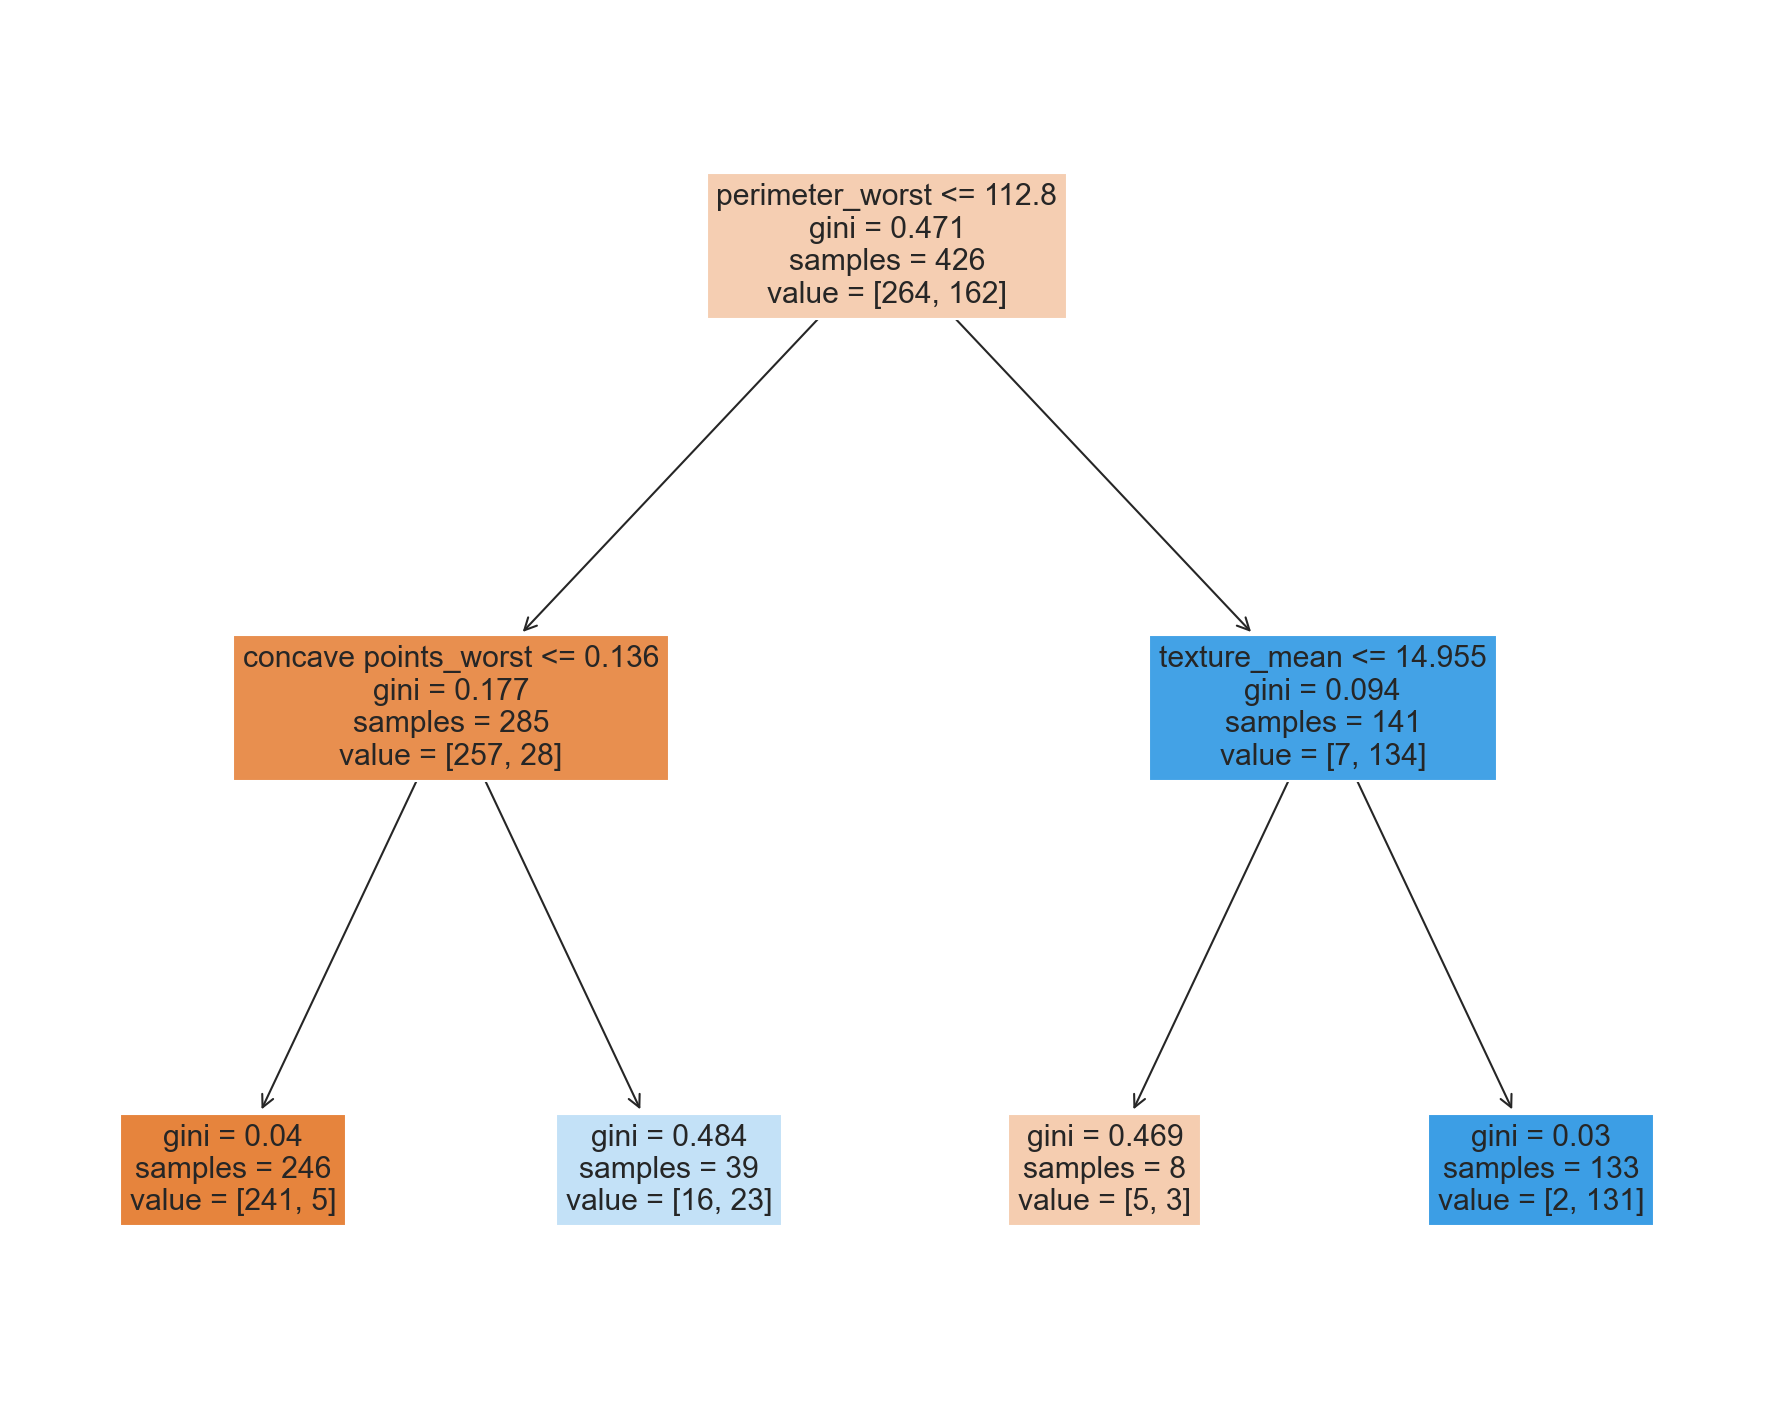

In [61]:
report_model(prunned_dtree)

In [62]:
y_pred_prunned_train = prunned_dtree.predict(x_train)
y_pred_prunned_test = prunned_dtree.predict(x_test)

In [63]:
print(accuracy_score(y_train, y_pred_prunned_train))
print()
print(accuracy_score(y_test, y_pred_prunned_test))

0.9389671361502347

0.9300699300699301


In [64]:
# Cross Validation approach
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(prunned_dtree, x_train, y_train, cv=10)
test_accuracy = cross_val_score(prunned_dtree, x_test, y_test, cv=10)
print(training_accuracy.mean())
print()
print(test_accuracy.mean())

0.8942414174972315

0.9019047619047619


# Building Bagging Algorithm 


In [65]:
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier()
bagging.fit(x_train, y_train)

BaggingClassifier()

In [66]:
# predict
y_pred_train_bgg = bagging.predict(x_train)
y_pred_test_bgg = bagging.predict(x_test)

In [67]:
# Evaluate 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [68]:
print(confusion_matrix(y_train, y_pred_train_bgg))
print()
print(confusion_matrix(y_test, y_pred_test_bgg))

[[264   0]
 [  1 161]]

[[90  3]
 [ 4 46]]


In [69]:
print(classification_report(y_train, y_pred_train_bgg))
print()
print(classification_report(y_test, y_pred_test_bgg))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       264
           1       1.00      0.99      1.00       162

    accuracy                           1.00       426
   macro avg       1.00      1.00      1.00       426
weighted avg       1.00      1.00      1.00       426


              precision    recall  f1-score   support

           0       0.96      0.97      0.96        93
           1       0.94      0.92      0.93        50

    accuracy                           0.95       143
   macro avg       0.95      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143



In [70]:
print(accuracy_score(y_train, y_pred_train_bgg))
print()
print(accuracy_score(y_test, y_pred_test_bgg))

0.9976525821596244

0.951048951048951


In [71]:
# Cross Validation approach
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(bagging, x_train, y_train, cv=10)
test_accuracy = cross_val_score(bagging, x_test, y_test, cv=10)
print(training_accuracy.mean())
print()
print(test_accuracy.mean())

0.9293466223698783

0.9580952380952381


# RandomForest Classifier Model

In [72]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200, criterion='entropy', 
                            bootstrap=True, oob_score=False)
rf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [73]:
# predict
y_pred_train_rf = rf.predict(x_train)
y_pred_test_rf = rf.predict(x_test)

In [74]:
print(confusion_matrix(y_train, y_pred_train_rf))
print()
print(confusion_matrix(y_test, y_pred_test_rf))

[[264   0]
 [  0 162]]

[[92  1]
 [ 3 47]]


In [75]:
print(classification_report(y_train, y_pred_train_rf))
print()
print(classification_report(y_test, y_pred_test_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       264
           1       1.00      1.00      1.00       162

    accuracy                           1.00       426
   macro avg       1.00      1.00      1.00       426
weighted avg       1.00      1.00      1.00       426


              precision    recall  f1-score   support

           0       0.97      0.99      0.98        93
           1       0.98      0.94      0.96        50

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.97       143
weighted avg       0.97      0.97      0.97       143



In [76]:
print(accuracy_score(y_train, y_pred_train_rf))
print()
print(accuracy_score(y_test, y_pred_test_rf))

1.0

0.972027972027972


In [77]:
# Cross Validation approach
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(rf, x_train, y_train, cv=10)
test_accuracy = cross_val_score(rf, x_test, y_test, cv=10)
print(training_accuracy.mean())
print()
print(test_accuracy.mean())

0.9647286821705426

0.9585714285714285


# K-nearest neighbors algorithm

In [78]:
from sklearn.neighbors import KNeighborsClassifier

In [79]:
y_test = np.ravel(y_test)

In [80]:
error_rate  = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

In [81]:
error_rate

[0.09090909090909091,
 0.04895104895104895,
 0.03496503496503497,
 0.04195804195804196,
 0.04895104895104895,
 0.04895104895104895,
 0.055944055944055944,
 0.055944055944055944,
 0.055944055944055944,
 0.06293706293706294,
 0.06293706293706294,
 0.06293706293706294,
 0.06293706293706294,
 0.06993006993006994,
 0.06993006993006994,
 0.055944055944055944,
 0.055944055944055944,
 0.055944055944055944,
 0.055944055944055944,
 0.055944055944055944,
 0.055944055944055944,
 0.06293706293706294,
 0.06293706293706294,
 0.06293706293706294,
 0.06293706293706294,
 0.06293706293706294,
 0.06293706293706294,
 0.06293706293706294,
 0.06293706293706294,
 0.06293706293706294,
 0.06293706293706294,
 0.06293706293706294,
 0.06293706293706294,
 0.06293706293706294,
 0.06293706293706294,
 0.06293706293706294,
 0.06293706293706294,
 0.06293706293706294,
 0.06293706293706294]

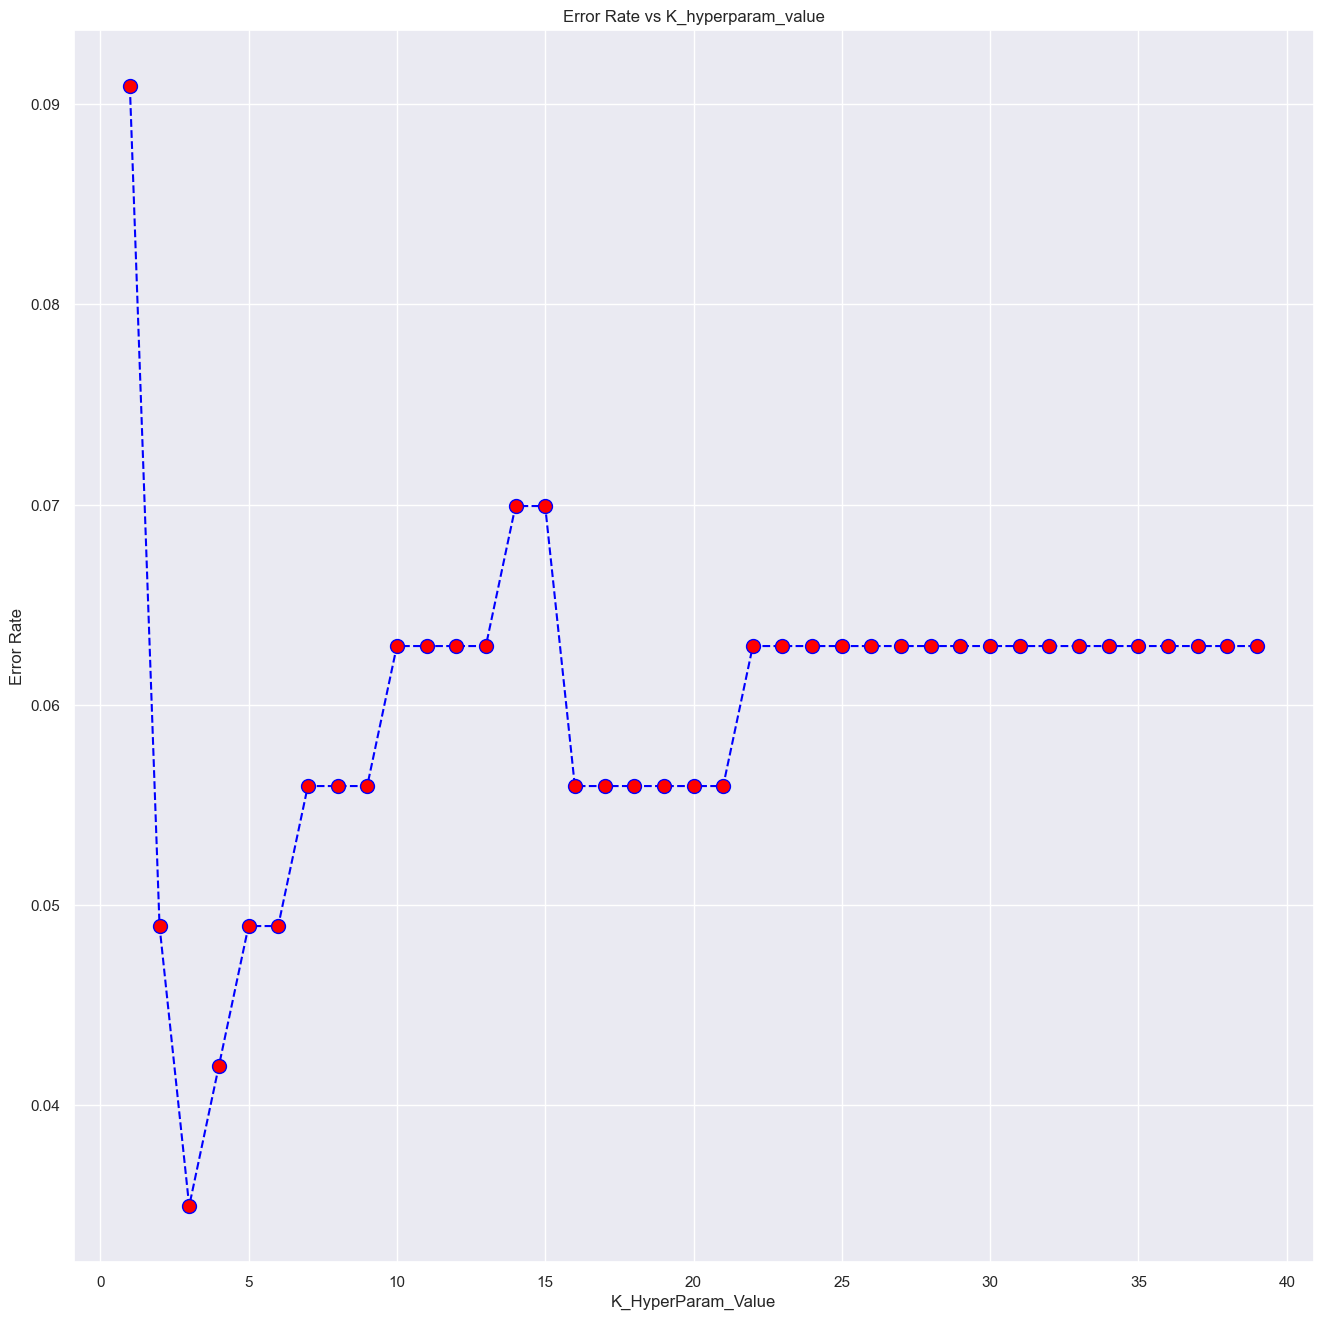

In [82]:
plt.figure(figsize=(16,16))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', 
         markerfacecolor='red', markersize=10)
plt.title("Error Rate vs K_hyperparam_value")
plt.xlabel("K_HyperParam_Value")
plt.ylabel("Error Rate")
plt.show()

In [83]:
# Basis analysis, error_rate would be less when we choose k=3

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [84]:
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)

In [85]:
# Evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [86]:
print(confusion_matrix(y_train, y_pred_train))
print("****************"*5)
print(confusion_matrix(y_test, y_pred_test))

[[257   7]
 [ 15 147]]
********************************************************************************
[[90  3]
 [ 2 48]]


In [87]:
print(classification_report(y_train, y_pred_train))
print("****************"*5)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       264
           1       0.95      0.91      0.93       162

    accuracy                           0.95       426
   macro avg       0.95      0.94      0.94       426
weighted avg       0.95      0.95      0.95       426

********************************************************************************
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        93
           1       0.94      0.96      0.95        50

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.97       143



In [88]:
print("Training Accuracy :", accuracy_score(y_train, y_pred_train))
print("****************"*5)
print("Test Accuracy :", accuracy_score(y_test, y_pred_test))

Training Accuracy : 0.9483568075117371
********************************************************************************
Test Accuracy : 0.965034965034965


In [89]:
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(knn, x_train, y_train, cv=10)
test_accuracy = cross_val_score(knn, x_test, y_test, cv=10)
print("Training Accuracy after CV :", training_accuracy.mean())
print("***********************"*5)
print("Test Accuracy after CV :", test_accuracy.mean())

Training Accuracy after CV : 0.9178848283499447
*******************************************************************************************************************
Test Accuracy after CV : 0.9366666666666668


# Support Vector Machine

In [90]:
from sklearn.svm import SVC

#kernel - linear
svm_linear = SVC(kernel='linear')
svm_linear.fit(x_train, y_train)
y_pred_train_linear = svm_linear.predict(x_train)
y_pred_test_linear = svm_linear.predict(x_test)

#kernel - sigmoid
svm_sigmoid = SVC(kernel='sigmoid')
svm_sigmoid.fit(x_train, y_train)
y_pred_train_sigmoid = svm_sigmoid.predict(x_train)
y_pred_test_sigmoid = svm_sigmoid.predict(x_test)

#kernel - poly
svm_poly = SVC(kernel='poly')
svm_poly.fit(x_train, y_train)
y_pred_train_poly = svm_poly.predict(x_train)
y_pred_test_poly = svm_poly.predict(x_test)

#kernel - rbf
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(x_train, y_train)
y_pred_train_rbf = svm_rbf.predict(x_train)
y_pred_test_rbf = svm_rbf.predict(x_test)

In [91]:
# Evulation 

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [92]:
print("Training Accuracy - Linear :", accuracy_score(y_train, y_pred_train_linear))
print("Test Accuracy - Linear :", accuracy_score(y_test, y_pred_test_linear))
print("*************"*5)
print("Training Accuracy - sigmoid :", accuracy_score(y_train, y_pred_train_sigmoid))
print("Test Accuracy - sigmoid :", accuracy_score(y_test, y_pred_test_sigmoid))
print("*************"*5)
print("Training Accuracy - poly :", accuracy_score(y_train, y_pred_train_poly))
print("Test Accuracy - poly :", accuracy_score(y_test, y_pred_test_poly))
print("*************"*5)
print("Training Accuracy - rbf :", accuracy_score(y_train, y_pred_train_rbf))
print("Test Accuracy - rbf :", accuracy_score(y_test, y_pred_test_rbf))

Training Accuracy - Linear : 0.9671361502347418
Test Accuracy - Linear : 0.972027972027972
*****************************************************************
Training Accuracy - sigmoid : 0.43896713615023475
Test Accuracy - sigmoid : 0.4825174825174825
*****************************************************************
Training Accuracy - poly : 0.9061032863849765
Test Accuracy - poly : 0.9300699300699301
*****************************************************************
Training Accuracy - rbf : 0.9131455399061033
Test Accuracy - rbf : 0.9370629370629371


In [93]:
print("Training Accuracy - Linear :", classification_report(y_train, y_pred_train_linear))
print("*************"*5)
print("Test Accuracy - Linear :", classification_report(y_test, y_pred_test_linear))


Training Accuracy - Linear :               precision    recall  f1-score   support

           0       0.97      0.98      0.97       264
           1       0.97      0.94      0.96       162

    accuracy                           0.97       426
   macro avg       0.97      0.96      0.96       426
weighted avg       0.97      0.97      0.97       426

*****************************************************************
Test Accuracy - Linear :               precision    recall  f1-score   support

           0       0.97      0.99      0.98        93
           1       0.98      0.94      0.96        50

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.97       143
weighted avg       0.97      0.97      0.97       143



In [94]:
# cross validation method
from sklearn.model_selection import cross_val_score
train_accuracy = cross_val_score(svm_linear, x_train, y_train, cv=10)
test_accuracy = cross_val_score(svm_linear, x_test, y_test, cv=10)
print("Training accuracy :", train_accuracy)
print("Training Mean Accuracy :", train_accuracy.mean())
print("************"*5)
print("Test accuracy :", test_accuracy)
print("Test Mean Accuracy :", test_accuracy.mean())



Training accuracy : [0.88372093 0.90697674 0.93023256 0.95348837 0.90697674 0.95348837
 0.97619048 0.97619048 0.95238095 0.95238095]
Training Mean Accuracy : 0.9392026578073089
************************************************************
Test accuracy : [0.93333333 0.86666667 0.93333333 0.78571429 1.         0.85714286
 0.92857143 1.         1.         0.85714286]
Test Mean Accuracy : 0.9161904761904761


# Voting Classifier Model

In [95]:
from sklearn.ensemble  import VotingClassifier

In [100]:
estimators = [('Logistic Regression',logit),('Decision Tree',prunned_dtree),('Bagging Algorith',bagging),('Random Forest',rf),('KNN',knn),('SVM',svm_linear)]

### Hyperparameter: Hard Voting

In [106]:
hard_voting = VotingClassifier(estimators=estimators, voting='hard' )
hard_voting.fit(x_train,y_train)


VotingClassifier(estimators=[('Logistic Regression',
                              LogisticRegression(multi_class='multinomial')),
                             ('Decision Tree',
                              DecisionTreeClassifier(max_depth=2)),
                             ('Bagging Algorith', BaggingClassifier()),
                             ('Random Forest',
                              RandomForestClassifier(criterion='entropy',
                                                     n_estimators=200)),
                             ('KNN', KNeighborsClassifier(n_neighbors=3)),
                             ('SVM', SVC(kernel='linear'))])

In [107]:
y_pred_train_hv= hard_voting.predict(x_train)
y_pred_test_hv= hard_voting.predict(x_test)

In [109]:
train_accuracy = cross_val_score(hard_voting, x_train, y_train, cv=10)
test_accuracy = cross_val_score(hard_voting, x_test, y_test, cv=10)
print("Training Accuracy :", train_accuracy.mean())
print("************"*5)
print("Test Accuracy :", test_accuracy.mean())

Training Accuracy : 0.9483942414174973
************************************************************
Test Accuracy : 0.9514285714285714


# Visualize Every Model with their accuarcy values

In [97]:
data = [
    ['Model', 'Train Accuracy(%)', 'Test Accuracy(%)'],
    ['Logistic Regression', 93, '95'],
    ['Decision Tree', 89, '91'],
    ['Bagging Algorithm', 96, '95'],
    ['RandomForset Model', 96, '96'],
    ['KNN Algorithm', 91, '93'],
    ['Support Vector Machine', 93, '91'],

]

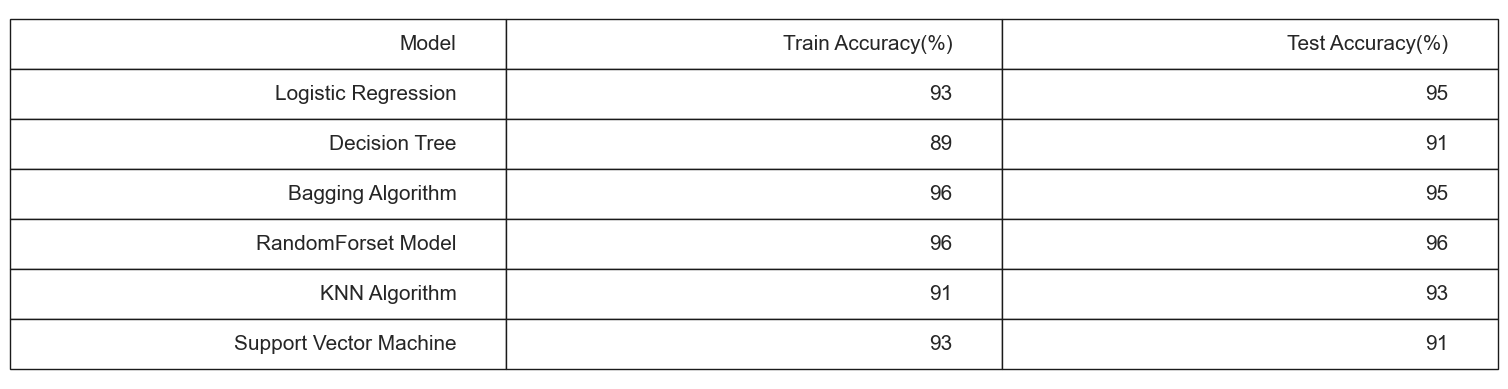

In [98]:
fig, ax = plt.subplots()
table = ax.table(cellText=data, loc='center')
table.auto_set_font_size(False)
table.set_fontsize(15)
table.scale(3, 3)

ax.axis('off')

plt.show()



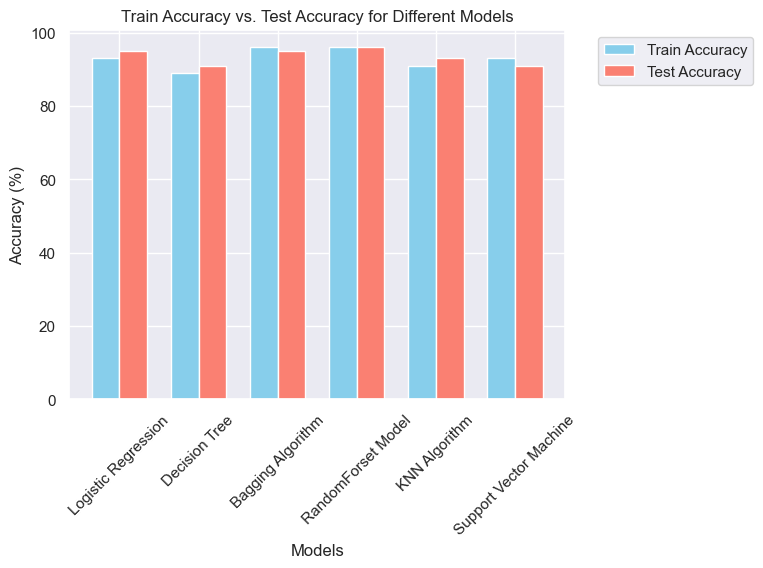

In [99]:
# Extract model names and accuracy values
models = [item[0] for item in data[1:]]
train_accuracy = [float(item[1]) for item in data[1:]]
test_accuracy = [float(item[2]) for item in data[1:]]

# Generate positions for the bars
x = np.arange(len(models))

# Set width of the bars
bar_width = 0.35

# Plotting the bar plot
plt.bar(x - bar_width/2, train_accuracy, bar_width, label='Train Accuracy', color='skyblue')
plt.bar(x + bar_width/2, test_accuracy, bar_width, label='Test Accuracy', color='salmon')

plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Train Accuracy vs. Test Accuracy for Different Models')
plt.xticks(x, models, rotation=45)  # Set model names as x-axis labels
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


**Conclusion:**
In this notebook, we implemented and compared various machine learning algorithms to classify breast cancer cells as benign or malignant. Each algorithm has its strengths and weaknesses, and the choice of the best model depends on the specific dataset and problem at hand. By evaluating the performance of these models using appropriate metrics (e.g., accuracy, precision, recall, F1-score), we can select the most suitable model for diagnosing breast cancer with high accuracy and reliability.